In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import pydot, graphviz 
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models,layers, optimizers
from tensorflow.keras.applications import VGG16

In [2]:
# save the relevant directories containing the pictures
# put an 'r' because the we want forward slash instead of backward slash
test_dir = r'C:\Users\tanch\OneDrive\Documents\Udemy\CNN for computer vision\Learning points\Convolutional Neural Networks\Codes for learning\CNN on colored image\cats_and_dogs_small\test'
train_dir = r'C:\Users\tanch\OneDrive\Documents\Udemy\CNN for computer vision\Learning points\Convolutional Neural Networks\Codes for learning\CNN on colored image\cats_and_dogs_small\train'
validation_dir = r'C:\Users\tanch\OneDrive\Documents\Udemy\CNN for computer vision\Learning points\Convolutional Neural Networks\Codes for learning\CNN on colored image\cats_and_dogs_small\validation'

# Data preprocessing

In [3]:
# create ImageDataGenerator object
# specify to rescale pixel values to [0,1]
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

 # this generator generates data        # directory variable specified earlier
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    # photos are resized to 150 x 150 
                                                   target_size = (150,150),
                                                    # IMPT: images are generated in batches of 20
                                                   batch_size = 20,
                                                   # specify binary classification
                                                   class_mode = 'binary')

                                                    # directory variable specified earlier
validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                    # photos are resized to 150 x 150 
                                                   target_size = (150,150),
                                                    # photos will come in batches of 20
                                                   batch_size = 20,
                                                   # specify binary classification
                                                   class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Building CNN

In [4]:
# specifying CNN model architecture
model = models.Sequential()
                        # using 32 filters of size 3x3  NOTE: default stride=1, default padding = 'valid'
model.add(layers.Conv2D( 32, (3,3), activation='relu',
                          # images were resized to 150x150 earlier
                        # 3 because images are colored
                          input_shape=(150,150,3)))
# each convolution layer has its own max pooling layer
model.add(layers.MaxPooling2D((2,2)))

                        # 64 filters of size 3x3  
model.add(layers.Conv2D( 64, (3,3), activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

                        # 128 filters of size 3x3  
model.add(layers.Conv2D( 128, (3,3), activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

                        # 128 filters of size 3x3  
model.add(layers.Conv2D( 128, (3,3), activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

# flatten to single array
model.add(layers.Flatten())

# 512 neuron hidden layer
model.add(layers.Dense(512, activation='relu'))

# 1 neuron output layer for binary classification
# sigmoid activation for binary classification
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [6]:
model.compile(loss='binary_crossentropy',
              # RMSprop used over sgd    # learning rate set to 0.0001
             optimizer= optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [7]:
                    # training data comes from the train_generator
history = model.fit_generator(train_generator,
                    # IMPT: 20 x 100 = 2000 images in training set
                   steps_per_epoch=100,
                   epochs=20,
                    # validation data comes from the validation generator
                   validation_data=validation_generator,
                    # IMPT 20 x 50 = 1000 images in the validation set
                   validation_steps = 50)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/20
100/100 [==============================] - 67s 667ms/step - loss: 0.6925 - acc: 0.5325 - val_loss: 0.6854 - val_acc: 0.5260
Epoch 2/20
100/100 [==============================] - 65s 648ms/step - loss: 0.6568 - acc: 0.6210 - val_loss: 0.7047 - val_acc: 0.5440
Epoch 3/20
100/100 [==============================] - 77s 766ms/step - loss: 0.6105 - acc: 0.6580 - val_loss: 0.6184 - val_acc: 0.6560
Epoch 4/20
100/100 [==============================] - 64s 639ms/step - loss: 0.5738 - acc: 0.7080 - val_loss: 0.6443 - val_acc: 0.6360
Epoch 5/20
100/100 [==============================] - 67s 673ms/step - loss: 0.5489 - acc: 0.7160 - val_loss: 0.5854 - val_acc: 0.6890
Epoch 6/20
100/100 [==============================] - 65s 654ms/step - loss: 0.5164 - acc: 0.7405 - val_loss: 0.7063 - val_acc: 0.6210
Epoch 7/20
100/100 [=

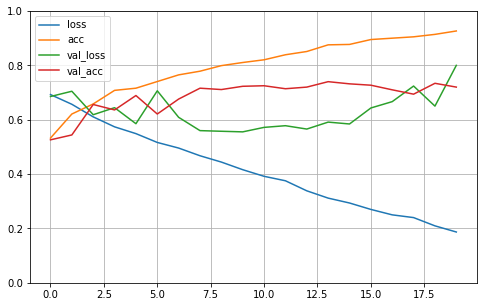

In [8]:
# visualise the training progression
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

- evident **overfitting as seen from the increasing difference between training and validation accruacy**

In [9]:
# save model
model.save('CNN_model.h5')

# Improving the model with Data augmentation and Dropout

In [10]:
# create ImageDataGenerator that augments image
# specify to rescale pixel values to [0,1]
train_datagen_augmented = ImageDataGenerator(rescale = 1./255,
                                   # the generator can choose any value within these ranges to augment the data
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

# data augmentation NOT required in validation set
test_datagen = ImageDataGenerator(rescale = 1./255)

 # this generator generates data        # directory variable specified earlier
train_generator_augmented = train_datagen_augmented.flow_from_directory(train_dir, 
                                                    # photos are resized to 150 x 150 
                                                   target_size = (150,150),
                                                    # IMPT: images are generated in batches of 20
                                                   batch_size = 20,
                                                   # specify binary classification
                                                   class_mode = 'binary')

                                                    # directory variable specified earlier
validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                    # photos are resized to 150 x 150 
                                                   target_size = (150,150),
                                                    # photos will come in batches of 20
                                                   batch_size = 20,
                                                   # specify binary classification
                                                   class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
# model_2 with dropout 50%
model_2 = models.Sequential()
                        # using 32 filters of size 3x3  NOTE: default stride=1, default padding = 'valid'
model_2.add(layers.Conv2D( 32, (3,3), activation='relu',
                          # images were resized to 150x150 earlier
                        # 3 because images are colored
                          input_shape=(150,150,3)))
# each convolution layer has its own max pooling layer
model_2.add(layers.MaxPooling2D((2,2)))

                        # 64 filters of size 3x3  
model_2.add(layers.Conv2D( 64, (3,3), activation='relu',input_shape=(150,150,3)))
model_2.add(layers.MaxPooling2D((2,2)))

                        # 128 filters of size 3x3  
model_2.add(layers.Conv2D( 128, (3,3), activation='relu',input_shape=(150,150,3)))
model_2.add(layers.MaxPooling2D((2,2)))

                        # 128 filters of size 3x3  
model_2.add(layers.Conv2D( 128, (3,3), activation='relu',input_shape=(150,150,3)))
model_2.add(layers.MaxPooling2D((2,2)))

# flatten to single array
model_2.add(layers.Flatten())

# in every epoch 50% of neurons are deactivated to reduce interneuron dependency and overfitting
model_2.add(layers.Dropout(0.5))

# 512 neuron hidden layer
model_2.add(layers.Dense(512, activation='relu'))

# 1 neuron output layer for binary classification
# sigmoid activation for binary classification
model_2.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model_2.compile(loss='binary_crossentropy',
              # RMSprop used over sgd    # learning rate set to 0.0001
             optimizer= optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [13]:
                    # model is fit into augmented data
history = model_2.fit_generator(train_generator_augmented,
                    # IMPT: 32 x 100 = 3200 augmented images 
                   steps_per_epoch=100,
                   epochs=20,
                    # validation data comes from the validation generator
                   validation_data=validation_generator,
                    # IMPT 32 x 50 = 1600 images in the validation set
                   validation_steps = 50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/20
100/100 [==============================] - 76s 763ms/step - loss: 0.6933 - acc: 0.5150 - val_loss: 0.6851 - val_acc: 0.5430
Epoch 2/20
100/100 [==============================] - 66s 663ms/step - loss: 0.6848 - acc: 0.5510 - val_loss: 0.6910 - val_acc: 0.5040
Epoch 3/20
100/100 [==============================] - 80s 803ms/step - loss: 0.6782 - acc: 0.5720 - val_loss: 0.6665 - val_acc: 0.5680
Epoch 4/20
100/100 [==============================] - 66s 659ms/step - loss: 0.6608 - acc: 0.6070 - val_loss: 0.6746 - val_acc: 0.5660
Epoch 5/20
100/100 [==============================] - 67s 669ms/step - loss: 0.6488 - acc: 0.6245 - val_loss: 0.6112 - val_acc: 0.6570
Epoch 6/20
100/100 [==============================] - 65s 649ms/step - loss: 0.6294 - acc: 0.6405 - val_loss: 0.6111 - val_acc: 0.6560
Epoch 7/20
100/100 [==============================] - 63s 628ms/step - loss: 0.6245 - acc: 0.6525

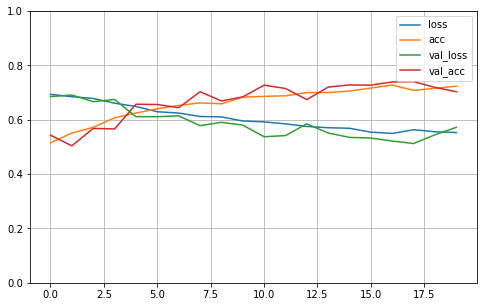

In [14]:
# visualise the training progression
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

- clearly, **with the augmentation and dropot, overfitting is much lesser**

In [15]:
# save model
model_2.save('CNN_model_augmentation_plus_dropout.h5')

# Improving mode with Transfer Learning

In [16]:
# create ImageDataGenerator that augments image
# specify to rescale pixel values to [0,1]
train_datagen_augmented = ImageDataGenerator(rescale = 1./255,
                                   # the generator can choose any value within these ranges to augment the data
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

# data augmentation NOT required in validation set
test_datagen = ImageDataGenerator(rescale = 1./255)

 # this generator generates data        # directory variable specified earlier
train_generator_augmented = train_datagen_augmented.flow_from_directory(train_dir, 
                                                    # photos are resized to 150 x 150 
                                                   target_size = (150,150),
                                                    # IMPT: images are generated in batches of 20
                                                   batch_size = 20,
                                                   # specify binary classification
                                                   class_mode = 'binary')

                                                    # directory variable specified earlier
validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                    # photos are resized to 150 x 150 
                                                   target_size = (150,150),
                                                    # photos will come in batches of 20
                                                   batch_size = 20,
                                                   # specify binary classification
                                                   class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
# convotional base of VGG16 is used instead of creating our own 
                    # these weights are the VGG16 final weights from imagenet competition
conv_base = VGG16( weights = 'imagenet',
                  # specify that we only want the convolution base
                 include_top = False,
                  # colored input was resized to 150 x 150 earlier
                 input_shape = (150,150,3))

In [18]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [19]:
# before trainging, decide whether to let the convolutoon layer be trainable
conv_base.trainable = False

In [20]:
# initialise the model w VGG16 convolution base
model_3 = models.Sequential()
model_3.add(conv_base)

# flatten to single array
model_3.add(layers.Flatten())

# 256 neuron hidden layer
model_3.add(layers.Dense(256, activation='relu'))

# 1 neuron output layer for binary classification
# sigmoid activation for binary classification
model_3.add(layers.Dense(1, activation='sigmoid'))

In [21]:
# by freezing the convolution base, there are 14 mil less params to train
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [19]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [22]:
model_3.compile(loss='binary_crossentropy',
              # RMSprop used over sgd    # learning rate set much lower because we are only fine tuning the weights
             optimizer= optimizers.RMSprop(lr=2e-5),
             metrics=['acc'])

In [23]:
# w early stopping we can set epochs to a high number and training will stop itself
checkpoint_cb = keras.callbacks.ModelCheckpoint('CNN_VGG16_early_stopping_model.h5',save_best_only = True)
                                                # if there are no improvements after 10 epochs training stops
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10,
                                                 restore_best_weights = True)

In [37]:
                    # model is fit into augmented data
history = model_3.fit_generator(train_generator_augmented,
                    # IMPT: 32 x 100 = 3200 augmented images 
                   steps_per_epoch=100,
                   epochs=2,
                    # validation data comes from the validation generator
                   validation_data=validation_generator,
                    # IMPT 32 x 50 = 1600 images in the validation set
                   validation_steps = 50,
                    # specify to save checkpoint via early stopping
                    callbacks= [checkpoint_cb, early_stopping_cb])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/2
100/100 [==============================] - 954s 10s/step - loss: 0.2941 - acc: 0.8750 - val_loss: 0.2318 - val_acc: 0.8990
Epoch 2/2
100/100 [==============================] - 908s 9s/step - loss: 0.2832 - acc: 0.8740 - val_loss: 0.2333 - val_acc: 0.8990


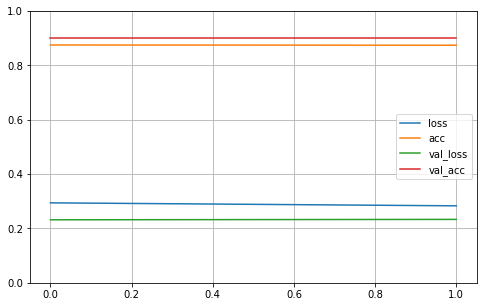

In [38]:
# 31th to 32th epoch
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [34]:
# load saved model
model_3 = keras.models.load_model('CNN_VGG16_early_stopping_model.h5')

- validation has **plateau'ed at 0.90 with very little overfitting**
- **setting convolution base to trainable will improve accuracy significantly**, but will also take more time due to more params